# **Classification II Lab: Working with classifiers**

In this lab session we are going to deep in our knowledge about classifiers by managing most well-known classification algorithms and reviewing some useful techniques, such as the cross validation process, which will allow us to adjust the free parameters of the classifier. For this lab session, we will work with a real multiclass data set: Iris. 

#### ** During this lab we will cover: **
#### * Part 1: K-Nearest Neighbours (K-NN)*
#### * Part 2: Support Vector Machines (SVMs) with different kernel funcions*
#### * Part 3: Trees and random forests*
#### * Part 4: Ensembles of classifiers: bagging and boosting*



As in previous lab session, to implement the different approaches we will base in [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.

### ** Part 0: Load and prepare the data **

The [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 150 patterns corresponding to 3 different types of irises: Setosa, Versicolour, and Virginica. Each pattern contains the sepal and petal lengths and widths. Despite having four input features, for display purposes, we are going to start working with the first two features: sepal length and sepal width. 

The below code let you:
* create training and testing partitions with the 60% and 40% of the original data
* normalize the data to zero mean and unitary standard deviation 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the random generator seed to compare results
np.random.seed(0)

# Load Iris data set
iris = datasets.load_iris()
X = iris.data[:,[ 1, 3]]  # we only take the first two features.
Y = iris.target

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.6)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ** Part 1: K-NN**

A K-NN approach classifies each new data searching its K nearest neighbors (among the training data) and assigning the majority class among these neighbors. As expected, its performance depends on the number of neighbors (K) used.

#### ** 1.1: Training a K-NN classifier**
To start to work, let's analyze for different values of K the K-NN performance, both over training and test sets. Use the [KNeighborsClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) method to complete the below code.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import neighbors

K_max=20
rang_K = np.arange(1, K_max+1)
vect_tr=[]
vect_test=[]

for n_neighbors in rang_K:
    # Create a KNN classifier, train it and compute training and error accuracies.
    clf = #<FILL IN>
    acc_tr = #<FILL IN>
    acc_test = #<FILL IN>
    
    # Saving accuracies in a list 
    vect_tr.append(acc_tr)
    vect_test.append(acc_test)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))
    

In [3]:
###########################################################
# SOLUTION
###########################################################

from sklearn import neighbors

K_max=20
rang_K = np.arange(1, K_max+1)
vect_tr=[]
vect_test=[]

for n_neighbors in rang_K:
    # Create a KNN classifier, train it and compute training and error accuracies.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, Y_train)
    acc_tr = clf.score(X_train, Y_train)
    acc_test=clf.score(X_test,Y_test)
    
    # Saving accuracies in a list
    vect_tr.append(acc_tr)
    vect_test.append(acc_test)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))
    

For K = 1, train accuracy is 100.00% and test accuracy is 88.89%
For K = 2, train accuracy is 96.67% and test accuracy is 86.67%
For K = 3, train accuracy is 95.00% and test accuracy is 94.44%
For K = 4, train accuracy is 93.33% and test accuracy is 94.44%
For K = 5, train accuracy is 95.00% and test accuracy is 94.44%
For K = 6, train accuracy is 95.00% and test accuracy is 94.44%
For K = 7, train accuracy is 95.00% and test accuracy is 94.44%
For K = 8, train accuracy is 95.00% and test accuracy is 94.44%
For K = 9, train accuracy is 95.00% and test accuracy is 95.56%
For K = 10, train accuracy is 95.00% and test accuracy is 93.33%
For K = 11, train accuracy is 95.00% and test accuracy is 92.22%
For K = 12, train accuracy is 93.33% and test accuracy is 91.11%
For K = 13, train accuracy is 95.00% and test accuracy is 91.11%
For K = 14, train accuracy is 95.00% and test accuracy is 91.11%
For K = 15, train accuracy is 95.00% and test accuracy is 91.11%
For K = 16, train accuracy is 95.

In [6]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(np.sum(np.array(vect_tr)),2), 18.90, 'incorrect result: Training error of K-NN is uncorrect')
Test.assertEquals(np.round(np.sum(np.array(vect_test)),2), 18.36, 'incorrect result: Test error of K-NN is uncorrect')


1 test passed.
1 test passed.


Next code, let you plot the evolution of above computed train and test accuracies.

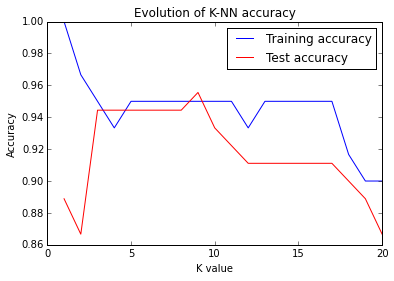

In [7]:
#Plot acc vs K
import matplotlib.pyplot as plt

plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy')
plt.show()

Above figure points out the necessity of selecting the adequate value of K, and using the training error for such selection would provide a poor generalization.

#### ** 1.2: Selecting the number of neighbors of a K-NN classifier**

Therefore, next step will consist of applying a cross validation (CV) process to select the optimum value of K. You can use the [GridSearchCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) function to implement it. 

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import neighbors
from sklearn.grid_search import GridSearchCV

# Parameters
K_max = 20
rang_K = np.arange(1, K_max+1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 10
score = 'precision'

# Cross validation proccess <FILL IN>
clf = #<FILL IN>

In [8]:
###########################################################
# SOLUTION
###########################################################

from sklearn import neighbors
from sklearn.grid_search import GridSearchCV

# Parameters
K_max = 20
rang_K = np.arange(1, K_max+1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 10
score = 'precision'

# Cross validation proccess <FILL IN>
clf = GridSearchCV(neighbors.KNeighborsClassifier( ),
                   tuned_parameters, cv=nfold, scoring=score)
clf.fit(X_train, Y_train)

print 'CV process sucessfully finished'

CV process sucessfully finished


/Users/vanessa/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After running the CV process, the classifier object  contains the information of the CV process (next cell explore the .grid\_scores\_ parameter to obtain this information).

Cross validation results:
For K = 1, validation accuracy is 92.78 (+/-4.957)%
For K = 2, validation accuracy is 92.78 (+/-4.957)%
For K = 3, validation accuracy is 93.89 (+/-5.032)%
For K = 4, validation accuracy is 93.89 (+/-5.032)%
For K = 5, validation accuracy is 93.89 (+/-5.032)%
For K = 6, validation accuracy is 95.00 (+/-5.045)%
For K = 7, validation accuracy is 95.00 (+/-5.045)%
For K = 8, validation accuracy is 95.00 (+/-5.045)%
For K = 9, validation accuracy is 95.00 (+/-5.045)%
For K = 10, validation accuracy is 93.89 (+/-5.000)%
For K = 11, validation accuracy is 93.89 (+/-5.000)%
For K = 12, validation accuracy is 93.89 (+/-5.000)%
For K = 13, validation accuracy is 95.00 (+/-5.045)%
For K = 14, validation accuracy is 93.06 (+/-4.939)%
For K = 15, validation accuracy is 94.17 (+/-5.008)%
For K = 16, validation accuracy is 89.44 (+/-8.514)%
For K = 17, validation accuracy is 91.94 (+/-4.789)%
For K = 18, validation accuracy is 86.11 (+/-8.848)%
For K = 19, validation accura

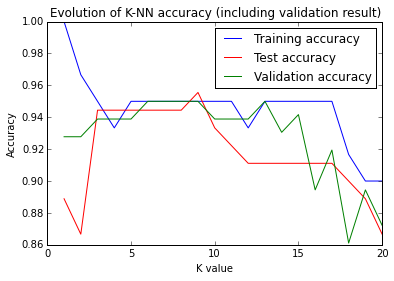

In [9]:
# Printing results
print("Cross validation results:")
for params, mean_score, scores in clf.grid_scores_:
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], 100*mean_score, 100*scores.std() / 2))

# Selecting validation error (mean values)
vect_val=[CV_result[1] for CV_result in clf.grid_scores_]

# Ploting results
plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.plot(rang_K,vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()

Examine the fields .best\_estimator\_ and .best\_params\_ of the classifier generated by the CV process to check the selected value of K and to access to the final classifier trained with this select value. Save the selected value of K in variable denoted K_opt and compute the test error of the final classifier.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Assign to K_opt the value of K selected by CV
K_opt = # <FILL IN>
print("The value optimum of K is %d" %(K_opt))

# Select the final classifier  and compute its test error
KNN_acc_test = # <FILL IN>
print("The test accuracy is %2.2f" %(100*KNN_acc_test))

In [10]:
###########################################################
# SOLUTION
###########################################################

# Assign to K_opt the value of K selected by CV
K_opt = clf.best_params_['n_neighbors']
print("The value optimum of K is %d" %(K_opt))

# Select the final classifier  and compute its test error
KNN_acc_test = clf.best_estimator_.score(X_test, Y_test)
print("The test accuracy is %2.2f" %(100*KNN_acc_test))

The value optimum of K is 6
The test accuracy is 94.44


Note that you can also compute the test error directly over the classifier object return by the CV process

In [11]:
KNN_acc_test2 = clf.score(X_test, Y_test)
print("The test accuracy is %2.2f" %(100*KNN_acc_test2))

The test accuracy is 94.44


In [12]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(K_opt, 6, 'incorrect result: The value of K_opt is uncorrect')
Test.assertEquals(np.round(KNN_acc_test,4), 0.9444, 'incorrect result: Test error of K-NN after CV process is uncorrect')


1 test passed.
1 test passed.


#### ** 1.3: Plotting K-NN classification boundary**

To finish this section, we are going to plot classification boundary of the K-NN classifier. For this purpose, next cell contains the plot_boundary function used in the first lab session. Use this function to plot the classification boundary of the cross validated K-NN classifier over training and test data.

In [13]:
# Plot the decision boundary
import matplotlib.pyplot as plt

def plot_boundary(clf, X, Y, plt):
    """Plot the classification regions for a given classifier.

    Args:
        clf: scikit-learn classifier object.
        X (numpy dnarray): training or test data to be plotted (number data x number dimensions). Only frist two 
                            dimensions are ploted
        Y (numpy dnarray): labels of the training or test data to be plotted (number data x 1).
        plt: graphic object where you wish to plot                                             
   
    """

    plot_colors = "brymc"
    plot_step = 0.02
    n_classes = np.unique(Y).shape[0]
    # Plot the decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Plot classification boundary over training data
plt.figure(1,figsize=(8, 6))
# <FILL IN> 

# Plot classification boundary over test data
plt.figure(2,figsize=(8, 6))
# <FILL IN> 

plt.show()

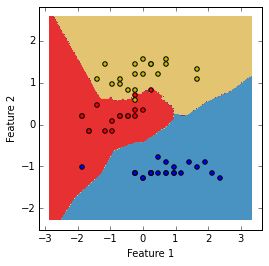

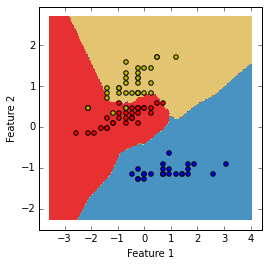

In [14]:
###########################################################
# SOLUTION
###########################################################

# Plot classification boundary over training data
plt.figure(1,figsize=(4, 4))
plot_boundary(clf, X_train, Y_train, plt)

# Plot classification boundary over test data
plt.figure(2,figsize=(4, 4))
plot_boundary(clf, X_test, Y_test, plt)

plt.show()

### ** Part 2: SVM**

SVM is one of the most well-known classifiers due to its good generalization properties in many different applications. Besides, by means of the kernel trick, its linear formulation can easily extended to a non linear fashion. 

Here, we will test its performance when different kernel functions are used. For this purpose, we can use the [SCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) method, which let you select the kernel function to be used, and the method GridSearchCV( ) to adjust the different parameters. 

Complete the following cells, when it is required, to train in each case a linear SVM (defining kernel='linear' in the method SCV( )), an SVM with gaussian kernel (kernel='rbf') and an SVM with polynomial kernel (kernel='poly'). For each method, adjust the corresponding free parameters with a 10 fold CV process exploring their values in the ranges defined at the beginning of each cell. Return the values of selected parameters and the accuracy of the final SVM.

#### ** 2.1: Linear SVM**

In [27]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import svm
rang_C = np.logspace(-3, 3, 10)
tuned_parameters = [{'C': rang_C}]

nfold = 10
score = 'precision'

# Train a liner SVM and adjust by CV the parameter C
lin_svc  = # <FILL IN> 

# Save the value of C selected and compute the final accuracy
C_opt = # <FILL IN> 
acc_lin_svc = # <FILL IN> 

print "The C value selected is " + str(C_opt)
print("The test accuracy of the linear SVM is %2.2f" %(100*acc_lin_svc))

SyntaxError: invalid syntax (<ipython-input-27-5bb2492657fd>, line 13)

In [28]:
###########################################################
# SOLUTION
###########################################################

from sklearn import svm
rang_C = np.logspace(-3, 3, 10)
tuned_parameters = [{'C': rang_C}]

nfold = 10
score = 'precision'

# Train a liner SVM and adjust by CV the parameter C
lin_svc  = GridSearchCV(svm.SVC(kernel='linear'),
                   tuned_parameters, cv=nfold, scoring=score)
lin_svc .fit(X_train, Y_train)

# Save the value of C selected and compute the final accuracy
C_opt = lin_svc.best_estimator_.C
acc_lin_svc = lin_svc.score(X_test, Y_test)


print "The C value selected is " + str(C_opt)
print("The test accuracy of the linear SVM is %2.2f" %(100*acc_lin_svc))


The C value selected is 0.464158883361
The test accuracy of the linear SVM is 95.00


In [19]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt,2), 0.46, 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(acc_lin_svc,4), 0.9556, 'incorrect result: Test accuracy of the linear SVM after CV process is uncorrect')


1 test passed.
1 test passed.


#### ** 2.2: SVM with gaussian kernel**

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

rang_g=np.array([1/8, 1/4, 1/2, 1, 2, 4, 8])
tuned_parameters = [{'C': rang_C, 'gamma': rang_g}]

# Train an SVM with gaussian kernel and adjust by CV the parameter C
rbf_svc  = # <FILL IN> 

# Save the values of C and gamma selected and compute the final accuracy
C_opt = # <FILL IN> 
g_opt = # <FILL IN> 


print "The C value selected is " + str(C_opt)
print "The gamma value selected is " + str(g_opt)
acc_rbf_svc = rbf_svc.score(X_test, Y_test)
print("The test accuracy of the RBF SVM is %2.2f" %(100*acc_rbf_svc))

In [20]:
###########################################################
# SOLUTION
###########################################################
n_dim=X_train.shape[1]
rang_g=np.array([0.125, 0.25, 0.5, 1, 2, 4, 8])/(np.sqrt(n_dim))
tuned_parameters = [{'C': rang_C, 'gamma': rang_g}]

# Train an SVM with gaussian kernel and adjust by CV the parameter C
rbf_svc  = GridSearchCV(svm.SVC(kernel='rbf'),
                   tuned_parameters, cv=nfold, scoring=score)
rbf_svc.fit(X_train, Y_train)

# Save the values of C and gamma selected and compute the final accuracy
C_opt = rbf_svc.best_estimator_.C
g_opt = rbf_svc.best_estimator_.gamma


print "The C value selected is " + str(C_opt)
print "The gamma value selected is " + str(g_opt)
acc_rbf_svc = rbf_svc.score(X_test, Y_test)
print("The test accuracy of the RBF SVM is %2.2f" %(100*acc_rbf_svc))

The C value selected is 2.15443469003
The gamma value selected is 0.0883883476483
Test error RBF SVM is 0.944444444444


In [21]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt, 2), 2.15, 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(g_opt, 2), 0.09, 'incorrect result: The value of g_opt is uncorrect')
Test.assertEquals(np.round(acc_rbf_svc, 4), 0.9444, 'incorrect result: Test accuracy of the rbf SVM after CV process is uncorrect')


1 test passed.
1 test passed.
1 test passed.


#### ** 2.3. SVM with polynomial kernel**

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

rang_d=np.arange(1,5)
tuned_parameters = [{'C': rang_C, 'degree': rang_d}]

# Train an SVM with polynomial kernel and adjust by CV the parameter C
poly_svc  = # <FILL IN> 

# Save the values of C and degree selected and compute the final accuracy
C_opt = # <FILL IN> 
d_opt = # <FILL IN> 


print "The C value selected is " + str(C_opt)
print "The degree value selected is " + str(d_opt)
acc_poly_svc = poly_svc.score(X_test, Y_test)
print("The test accuracy of the polynomial SVM is %2.2f" %(100*acc_poly_svc))

In [22]:
###########################################################
# SOLUTION
###########################################################

rang_d=np.arange(1,5)
tuned_parameters = [{'C': rang_C, 'degree': rang_d}]

# Train an SVM with polynomial kernel and adjust by CV the parameter C
poly_svc  = GridSearchCV(svm.SVC(kernel='poly'),
                   tuned_parameters, cv=nfold, scoring=score)
poly_svc.fit(X_train, Y_train)

# Save the values of C and degree selected and compute the final accuracy
C_opt = poly_svc.best_estimator_.C
d_opt = poly_svc.best_estimator_.degree


print "The C value selected is " + str(C_opt)
print "The degree value selected is " + str(d_opt)
acc_poly_svc = poly_svc.score(X_test, Y_test)
print("The test accuracy of the polynomial SVM is %2.2f" %(100*acc_poly_svc))

The C value selected is 10.0
The degree value selected is 3
Test error polynomical SVM is 0.911111111111


In [23]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(C_opt, 2), 10 , 'incorrect result: The value of C_opt is uncorrect')
Test.assertEquals(np.round(d_opt, 2), 3, 'incorrect result: The value of d_opt is uncorrect')
Test.assertEquals(np.round(acc_poly_svc, 4), 0.9111, 'incorrect result: Test accuracy of the polynomial SVM after CV process is uncorrect')


1 test passed.
1 test passed.
1 test passed.


#### ** 2.4. Plot the classification boundaries and support vectors**

The SVM decision function depends on some subset of the training data, called the support vectors. In this section we are going to compare the boundaries provided by the different kernel functions and study which training points are support vectors.

As in previous sections, you can use the plot_boundary( ) function to display the decision regions. To obtain the support vectors, you can access to the parameters support\_vectors\_ of the svm classifier object. Add the necessary code to include them in the figure.


In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

plt.figure(1,figsize=(10, 10))

# Linear SVM 
plt.subplot(3,2,1)
plot_boundary(lin_svc , X_train, Y_train, plt)
SVs = #<FILL IN>
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,2)
plot_boundary(lin_svc , X_train, Y_train, plt)

# RBF SVM 
plt.subplot(3,2,3)
plot_boundary(rbf_svc , X_train, Y_train, plt)
SVs = #<FILL IN>
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,4)
plot_boundary(rbf_svc , X_train, Y_train, plt)

# Polynomial SVM 
plt.subplot(3,2,5)
plot_boundary(poly_svc , X_train, Y_train, plt)
SVs = #<FILL IN>
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,6)
plot_boundary(poly_svc , X_train, Y_train, plt)

plt.show()


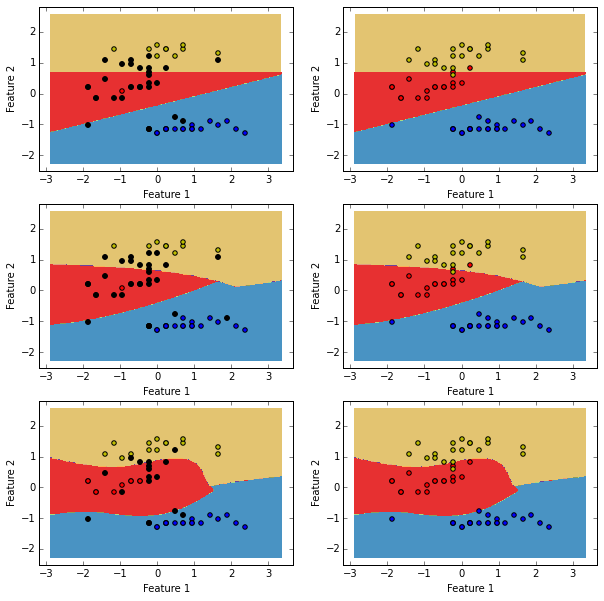

In [24]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

plt.figure(1,figsize=(10, 10))

# Linear SVM 
plt.subplot(3,2,1)
plot_boundary(lin_svc , X_train, Y_train, plt)
SVs=lin_svc.best_estimator_.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,2)
plot_boundary(lin_svc , X_train, Y_train, plt)

# RBF SVM 
plt.subplot(3,2,3)
plot_boundary(rbf_svc , X_train, Y_train, plt)
SVs=rbf_svc.best_estimator_.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,4)
plot_boundary(rbf_svc , X_train, Y_train, plt)

# Polynomial SVM 
plt.subplot(3,2,5)
plot_boundary(poly_svc , X_train, Y_train, plt)
SVs=poly_svc.best_estimator_.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], c='k')
plt.subplot(3,2,6)
plot_boundary(poly_svc , X_train, Y_train, plt)

plt.show()


Note that the boundaries of linear and RBF SVMs and,  even, their SVs are quite similar. Examine the value selected for the parameter gamma of the gaussian kernel and try to explain because RBF SVM boundary tends to be linear.

### ** Part 3: Trees and Random Forest**

Trees and Random Forest classifiers directly work over the input features selecting the most discriminative ones and fixing a threshold over them. To be able to analyze their capabilities, in the following sections, we are going to use all input features of the Iris dataset. So, let's start running the following cell to load the complete Iris data.

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the random generator seed to compare results
np.random.seed(0)

iris = datasets.load_iris()
X = iris.data # All input features are used
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### ** 3.1: Decision Trees**

Decision Trees learn simple decision rules selecting iteratively a input feature and setting a threshold over it, so the are simple tool to understand and to interpret.

Use the [DecisionTreeClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) function to train a decision tree. Although the tree depth is usually a parameter to select, here we are working with only for input features, so you can use all default parameter and obtain a good performance. Complete the following code to return in the variable acc\_tree the tree accuracy.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn import tree
clf_tree = # <FILL IN>

acc_tree= # <FILL IN>

print("The test accuracy of the decision tree is %2.2f" %(100*acc_tree))

In [30]:
###########################################################
# SOLUTION
###########################################################

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, Y_train)
acc_tree=clf_tree.score(X_test,Y_test)
print("The test accuracy of the decision tree is %2.2f" %(100*acc_tree))

The test accuracy of the decision tree is 95.00


In [31]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_tree, 2), 0.95 , 'incorrect result: The value of C_opt is uncorrect')

1 test passed.


#### ** 3.2: Random Forest**

A Random Forest (RF) trains several decision tree classifiers, where each one is trained with different sub-samples of the training data, and averages their outputs to improve the final accuracy.

Use the [RandomForestClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function to train a RF classifier and select by cross validation the number of trees to use. The remaining parameters, such as the number of subsampled data or features, can be used with their default values. Return the optimal number of trees to be used and the final accuracy of the RF classifier.

In [ ]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

from sklearn.ensemble import RandomForestClassifier

rang_n_trees=np.arange(1,10)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 10
score = 'precision'

clf_RF  = #<FILL IN>
n_trees_opt = #<FILL IN>
acc_RF = #<FILL IN>

print "The number of selected trees is " + str(n_trees_opt)
print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

In [36]:
###########################################################
# SOLUTION
###########################################################

from sklearn.ensemble import RandomForestClassifier

rang_n_trees=np.arange(1,10)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 10
score = 'precision'

clf_RF  = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=nfold, scoring=score)
clf_RF.fit(X_train, Y_train)
n_trees_opt = clf_RF.best_estimator_.n_estimators
acc_RF = clf_RF.score(X_test, Y_test)

print "The number of selected trees is " + str(n_trees_opt)
print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

The number of selected trees is 1
The test accuracy of the RF is 90.00


Run the above code again, do you obtain the same accuracy? 

#### ** 3.3: Obtaining results statistically significant**

Random forest have a random component when the training data are subsampled, so you can obtain a different result for different runnings of the algorithm. In this case, to be able to provide a statistically significant measurement of the performance of the classifier, we need to average the result over enough large number of runs.

Complete the following code, to train again the RF classifier, but averaging its test accuracies over 50 runs. Provide its averaged accuracy and the averaged number of selected trees (include their standard deviations). 

In [42]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to compare results
np.random.seed(0)

# Create RF classifier object with CV
clf_RF  = # <FILL IN> 

acc_RF_vector=[]
n_trees_vector=[]
for run in np.arange(50):
    # For each run, train it, compute its accuracy and examine the number of optimal trees
    clf_RF.# <FILL IN> 
    acc = # <FILL IN> 
    acc_RF_vector.append(acc)
    n_trees = # <FILL IN> 
    n_trees_vector.append(n_trees)

# Compute averaged accuracies and number of used trees
mean_acc_RF = # <FILL IN> 
std_acc_RF = # <FILL IN> 

mean_n_trees = # <FILL IN> 
std_n_trees = # <FILL IN> 

# Print the results
print('Averaged accuracy for RF classifier is %2.2f +/- %2.2f '%(100*mean_acc_RF, 100*std_acc_RF))
print('Averaged number of selected trees is %2.2f +/- %2.2f '%(mean_n_trees, std_n_trees))

Averaged accuracy for RF classifier is 92.10 +/- 2.72 
Averaged number of selected trees is 4.66 +/- 2.54 


In [44]:
###########################################################
# SOLUTION
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

# Create RF classifier object with CV
clf_RF  = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=nfold, scoring=score)

acc_RF_vector=[]
n_trees_vector=[]
for run in np.arange(50):
    # For each run, train it, compute its accuracy and examine the number of optimal trees
    clf_RF.fit(X_train, Y_train)
    acc = clf_RF.score(X_test, Y_test)
    acc_RF_vector.append(acc)
    n_trees = clf_RF.best_estimator_.n_estimators
    n_trees_vector.append(n_trees)

# Compute averaged accuracies and number of used trees
mean_acc_RF = np.mean(np.array(acc_RF_vector))
std_acc_RF = np.std(np.array(acc_RF_vector))

mean_n_trees = np.mean(np.array(n_trees_vector))
std_n_trees = np.std(np.array(n_trees_vector))

# Print the results
print('Averaged accuracy for RF classifier is %2.2f +/- %2.2f '%(100*mean_acc_RF, 100*std_acc_RF))
print('Averaged number of selected trees is %2.2f +/- %2.2f '%(mean_n_trees, std_n_trees))

Averaged accuracy for RF classifier is 92.10 +/- 2.72 
Averaged number of selected trees is 4.66 +/- 2.54 


In [48]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(mean_acc_RF, 2), 0.92 , 'incorrect result: The value of mean_acc_RF is uncorrect')
Test.assertEquals(np.round(std_acc_RF, 4), 0.0272 , 'incorrect result: The value of std_acc_RF is uncorrect')
Test.assertEquals(np.round(mean_n_trees, 2), 4.66 , 'incorrect result: The value of mean_n_trees is uncorrect')
Test.assertEquals(np.round(std_n_trees, 2), 2.54 , 'incorrect result: The value of std_n_trees is uncorrect')

1 test passed.
1 test passed.
1 test passed.
1 test passed.


### ** Part 4: Ensembles**
The goal of ensemble methods is to combine the predictions of several base estimators or learners to obtain a classifier of improved performance. We are going to work with two ensemble methods:

* Bagging methods: their driving principle is to build several estimators with diversity among them and then to average their predictions. 
* Boosting methods: in this case, base estimators are built sequentially forcing new learners to pay more attention to samples missclassified by previous learners. 


#### ** 4.1. Bagging methods**

Here, to implement bagged classifiers, we are going to use [BaggingClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) object which includes different degrees of freedom in the learners design: with or without samples replacement, selecting random subsets of features instead of samples or selecting subsets of both samples and features. 

For the sake of simplicity, we are going to use as base learner a decision stump (i.e., a decision tree with one depth level). Note that in the case of using decision trees as learners, the resulting ensemble results in a random forest. 

Complete the following code to train a ensemble of bagged decision stumps. Set max\_samples (percentage of training data used to train each learner) and max\_features parameters (percentage of input features used to train each learner) to 0.5, and fix to 10 the number of learners used.

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
base_learner = tree.DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(base_learner, n_estimators = 10, max_samples=0.5, max_features = 0.5)
bagging.fit(X_train, Y_train)
acc_test = bagging.score(X_test, Y_test)

print('Accuracy of bagged ensemble is %2.2f '%(100*acc_test))

Accuracy for bagged ensemble is 93.33 


Analyze the final ensemble performance according to the number of learners. Average the result over 20 or more different runs to obtain statically significant results (note that the above accuracy change if you run the code again).

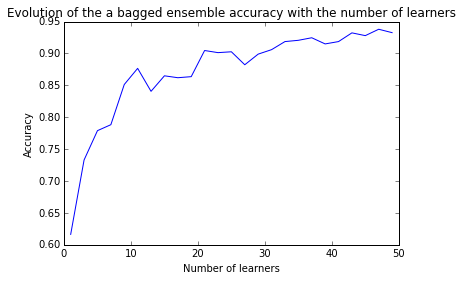

In [52]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

acc_test_evol = []
rang_n_learners = range(1,50,2)
for n_learners in rang_n_learners:
    acc_test_run=[]
    for run in range(50):
        bagging = # <FILL IN>
        acc = # <FILL IN>
        acc_test_run.append(acc)
    acc_test_evol.append(np.mean(acc_test_run))

# Ploting results
plt.figure()
plt.plot(rang_n_learners,acc_test_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Evolution of the a bagged ensemble accuracy with the number of learners ')
plt.show()

In [ ]:
###########################################################
# SOLUTION
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

acc_test_evol = []
rang_n_learners = range(1,50,2)
for n_learners in rang_n_learners:
    acc_test_run=[]
    for run in range(50):
        bagging = BaggingClassifier(base_learner, n_learners, max_samples=0.5, max_features = 0.5).fit(X_train, Y_train)
        acc = bagging.score(X_test, Y_test)
        acc_test_run.append(acc)
    acc_test_evol.append(np.mean(acc_test_run))

# Ploting results
plt.figure()
plt.plot(rang_n_learners,acc_test_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Evolution of the a bagged ensemble accuracy with the number of learners ')
plt.show()

In [55]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_test_evol[-1], 2), 0.93 , 'incorrect result: The value final of acc_test_evol is uncorrect')

1 test passed.


#### ** 4.2. Adaboost**

To train an AdaBoost classifier, scikit-learn provides [AdaBoostClassifier()](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) method which includes two versions of the Adaboost algorithm:
* Discrete Adaboost: the learners' outputs are discretized (they provide an estimation of the labels).
* Real Adaboost: the learners' outputs are real values (they are the soft-outputs or the class probabilities).

As in previous subsection, use a decision stump as base learner. Fix to 50 the number of learners and compare the results of both approaches: Discrete Adaboost (set algorithm parameter to 'SAMME') and Real Adaboost (algorithm='SAMME.R').

In [56]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

from sklearn.ensemble import AdaBoostClassifier

base_learner = tree.DecisionTreeClassifier(max_depth=1)

# Train a discrete Adaboost classifier and obtain its accuracy
AB_D = #<FILL IN>
acc_AB_D = # <FILL IN>

# Train a real Adaboost classifier and obtain its accuracy
AB_R = # <FILL IN>
acc_AB_R = # <FILL IN>

print('Accuracy of discrete adaboost ensemble is %2.2f '%(100*acc_AB_D))
print('Accuracy of real adaboost ensemble is %2.2f '%(100*acc_AB_R))

Accuracy of discrete adaboost ensemble is 95.00 
Accuracy of real adaboost ensemble is 90.00 


In [56]:
###########################################################
# SOLUTION
###########################################################
# Initialize the random generator seed to test results
np.random.seed(0)

from sklearn.ensemble import AdaBoostClassifier

base_learner = tree.DecisionTreeClassifier(max_depth=1)

# Train a discrete Adaboost classifier and obtain its accuracy
AB_D = AdaBoostClassifier(base_learner, algorithm='SAMME',n_estimators=50)
AB_D.fit(X_train, Y_train)
acc_AB_D = AB_D.score(X_test, Y_test)

# Train a real Adaboost classifier and obtain its accuracy
AB_R = AdaBoostClassifier(base_learner, algorithm='SAMME.R',n_estimators=50)
AB_R.fit(X_train, Y_train)
acc_AB_R = AB_R.score(X_test, Y_test)

print('Accuracy of discrete adaboost ensemble is %2.2f '%(100*acc_AB_D))
print('Accuracy of real adaboost ensemble is %2.2f '%(100*acc_AB_R))

Accuracy of discrete adaboost ensemble is 95.00 
Accuracy of real adaboost ensemble is 90.00 


In [59]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST accuracy values
Test.assertEquals(np.round(acc_AB_D, 2), 0.95 , 'incorrect result: The value of acc_AB_D is uncorrect')
Test.assertEquals(np.round(acc_AB_R, 2), 0.90 , 'incorrect result: The value of acc_AB_R is uncorrect')

1 test passed.
1 test passed.


Unlike BaggingClassifier() method, AdaBoostClassifier() let you analyze the evolution of error without having to train the ensemble for different number of learners. For this task, you can use the classifier method .staged_score() which returns the evolution of the ensemble accuracy. Note that it returns this information with a generator object, so you have to iterate over it to access to each element.

The following code lines let you plot the evolution of the ensemble accuracy (over the test data) for both discrete and real Adaboost approaches. 

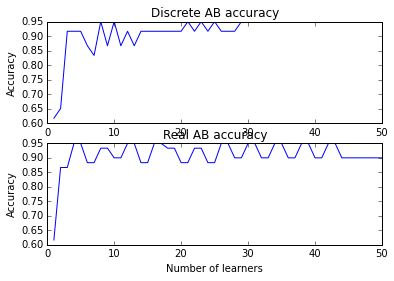

In [60]:
acc_AB_D_evol=[acc for acc in AB_D.staged_score(X_test, Y_test)]
acc_AB_R_evol=[acc for acc in AB_R.staged_score(X_test, Y_test)]


# Ploting results
rang_n_learners=np.arange(50)+1
plt.figure()
plt.subplot(211)
plt.plot(rang_n_learners,acc_AB_D_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Discrete AB accuracy')
plt.subplot(212)
plt.plot(rang_n_learners,acc_AB_R_evol)
plt.xlabel('Number of learners')
plt.ylabel('Accuracy')
plt.title('Real AB accuracy')
plt.show()
